In [91]:
import numpy as np
import pandas as pd

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [94]:
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [95]:
df = pd.read_csv("credit_dataset.csv")

In [96]:
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [97]:
df.isnull().sum()
df = df.dropna()


In [98]:
df.duplicated().sum()
df = df.drop_duplicates()


In [99]:
df.dtypes


,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [100]:
X = df.drop('Class', axis=1)
y = df['Class']


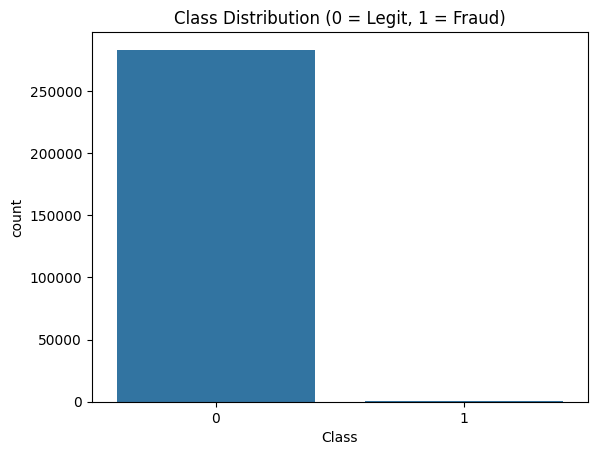

In [101]:
#Class Distribution (Fraud vs Legit)
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()


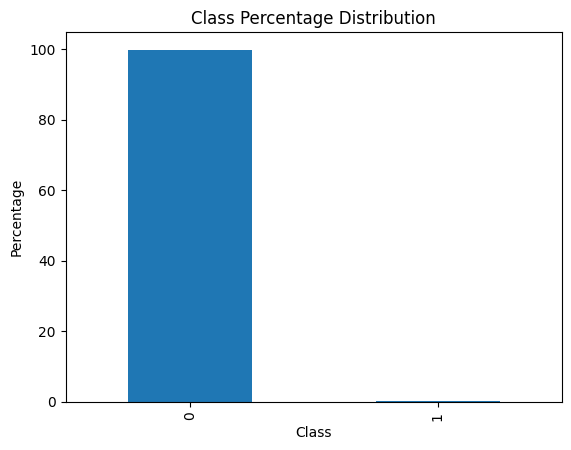

In [102]:
#Class Percentage
(df['Class'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title("Class Percentage Distribution")
plt.ylabel("Percentage")
plt.show()


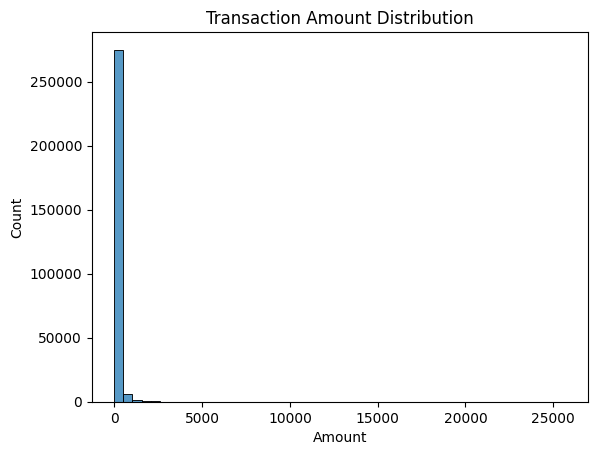

In [103]:
#Transaction Amount Distribution
sns.histplot(df['Amount'], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()


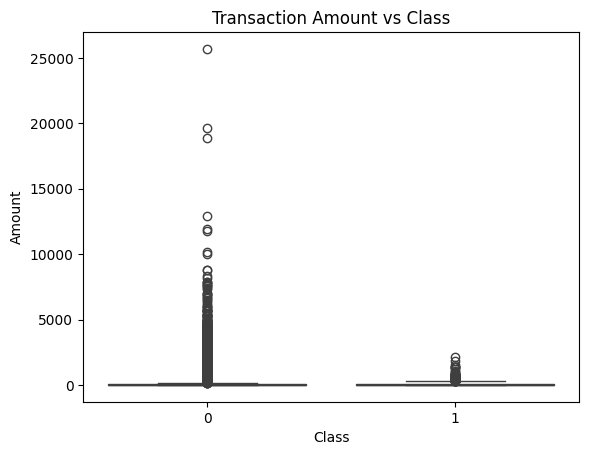

In [104]:
#Amount vs Class (Boxplot)
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount vs Class")
plt.show()


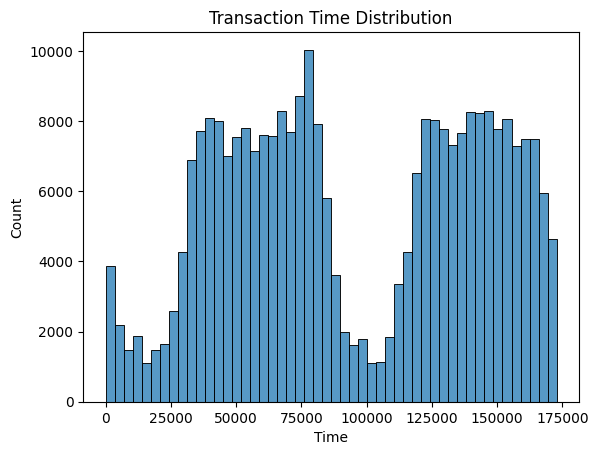

In [105]:
#Transaction Time Distribution
sns.histplot(df['Time'], bins=50)
plt.title("Transaction Time Distribution")
plt.show()


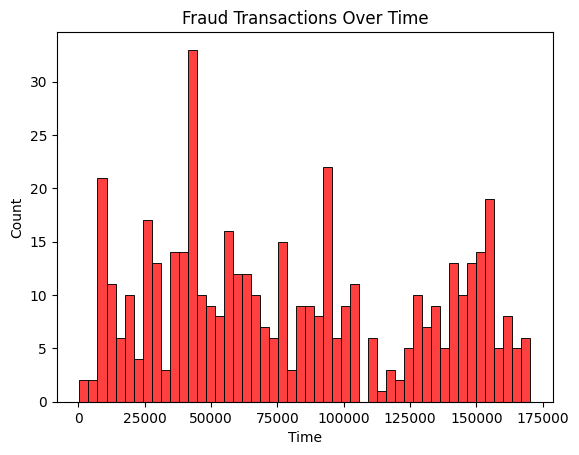

In [106]:
#Fraud Transactions Over Time
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, color='red')
plt.title("Fraud Transactions Over Time")
plt.show()


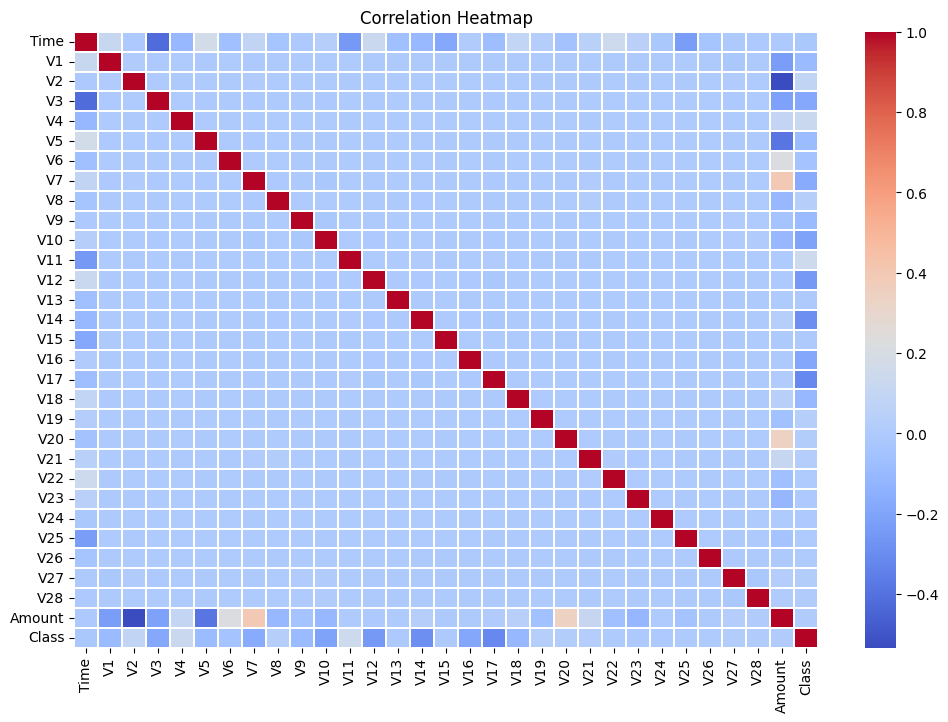

In [107]:
#Correlation Heatmap (ALL FEATURES)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.3)
plt.title("Correlation Heatmap")
plt.show()


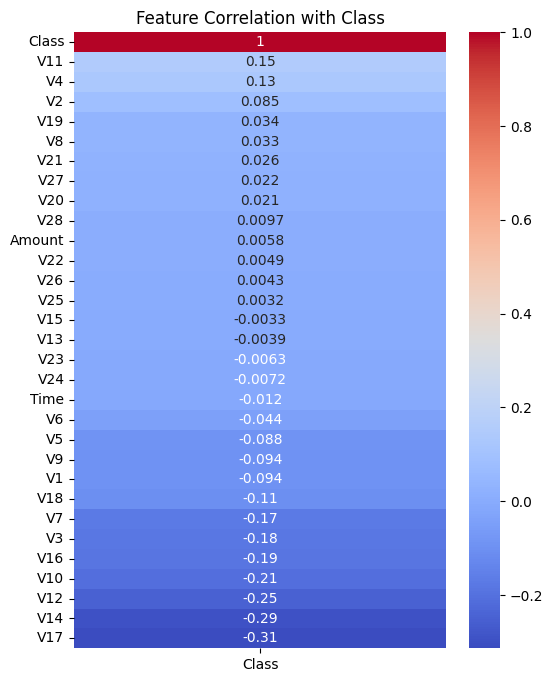

In [108]:
#Correlation with Target (Class)
plt.figure(figsize=(6,8))
sns.heatmap(
    df.corr()[['Class']].sort_values(by='Class', ascending=False),
    annot=True,
    cmap='coolwarm'
)
plt.title("Feature Correlation with Class")
plt.show()


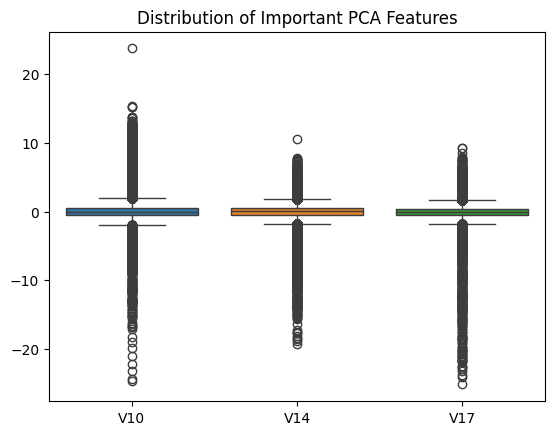

In [109]:
#Important PCA Features Distribution
sns.boxplot(data=df[['V10', 'V14', 'V17']])
plt.title("Distribution of Important PCA Features")
plt.show()


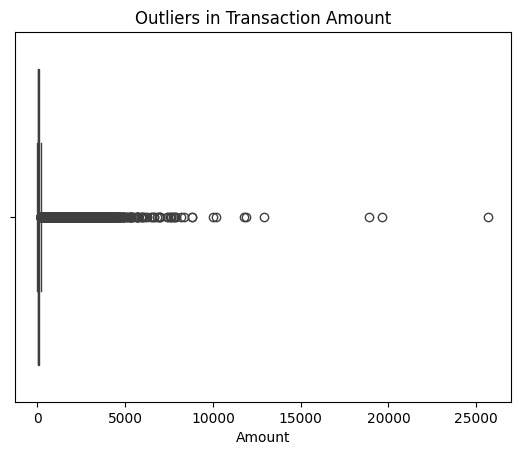

In [110]:
#Outliers in Transaction Amount
sns.boxplot(x=df['Amount'])
plt.title("Outliers in Transaction Amount")
plt.show()


In [111]:
# Scaling
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])


In [112]:
# Log transformation
df['Amount_log'] = np.log1p(df['Amount'])


In [113]:
# Remove highly correlated features
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [col for col in upper.columns if any(upper[col] > 0.95)]
df = df.drop(columns=drop_cols)

In [114]:
fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0].sample(len(fraud) * 5, random_state=42)

df_fast = pd.concat([fraud, legit]).sample(frac=1, random_state=42)

print(df_fast['Class'].value_counts())

Class
0    2365
1     473
Name: count, dtype: int64


In [115]:
X = df_fast.drop('Class', axis=1)
y = df_fast['Class']

In [125]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(
        n_estimators=50, max_depth=10, n_jobs=-1
    ),
    "Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    print(f"\nTraining {name}...")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })



Training Logistic Regression...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.86      0.59      0.70        95

    accuracy                           1.00     56746
   macro avg       0.93      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC: 0.9643709545704122

Training Decision Tree...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.87      0.69      0.77        95

    accuracy                           1.00     56746
   macro avg       0.93      0.85      0.89     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC: 0.8753125554526376

Training Random Forest...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.73      0.83        95

    accuracy                           

In [118]:
# NEURAL NETWORK (ANN)
ann_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_res.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

ann_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Precision', 'Recall']
)

ann_model.fit(
    X_train_res, y_train_res,
    epochs=15,
    batch_size=2048,
    validation_split=0.2,
    verbose=1
)

y_pred_ann = (ann_model.predict(X_test) > 0.5).astype(int)
y_prob_ann = ann_model.predict(X_test)

metrics.append({
    "Model": "Neural Network (ANN)",
    "Accuracy": accuracy_score(y_test, y_pred_ann),
    "Precision": precision_score(y_test, y_pred_ann),
    "Recall": recall_score(y_test, y_pred_ann),
    "F1-Score": f1_score(y_test, y_pred_ann),
    "ROC-AUC": roc_auc_score(y_test, y_prob_ann)
})


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - Precision: 0.6505 - Recall: 0.7844 - loss: 0.5224 - val_Precision: 1.0000 - val_Recall: 0.8890 - val_loss: 0.1884
Epoch 2/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - Precision: 0.9623 - Recall: 0.8967 - loss: 0.1445 - val_Precision: 1.0000 - val_Recall: 0.9276 - val_loss: 0.1440
Epoch 3/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - Precision: 0.9663 - Recall: 0.9264 - loss: 0.1056 - val_Precision: 1.0000 - val_Recall: 0.9466 - val_loss: 0.1193
Epoch 4/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - Precision: 0.9701 - Recall: 0.9401 - loss: 0.0887 - val_Precision: 1.0000 - val_Recall: 0.9622 - val_loss: 0.0954
Epoch 5/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - Precision: 0.9726 - Recall: 0.9513 - loss: 0.0755 - val_Precision: 1.0000 - val_Recall: 0.9739 - val_loss: 0.0747
Epoch 6/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - Precision: 0.9755 - Recall: 0.9630 - loss: 0.0627 - val_Precision: 1.0000 - val_Recall: 0.9823 - val_lo

                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0   Logistic Regression  0.974007   0.053687  0.873684  0.101158  0.964977
2  Neural Network (ANN)  0.997691   0.409091  0.852632  0.552901  0.958305
1         Decision Tree  0.997991   0.438710  0.715789  0.544000  0.857127


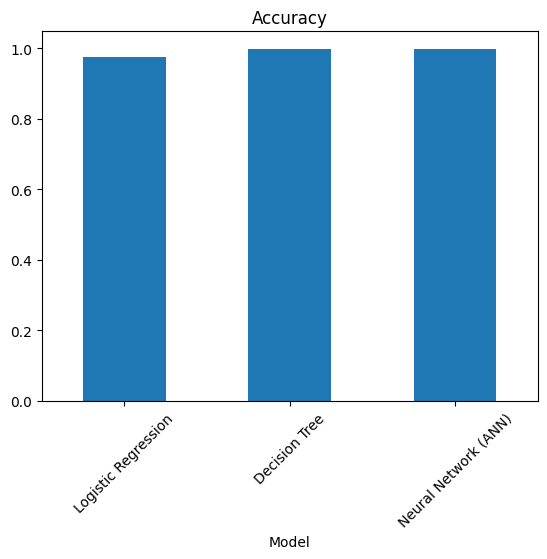

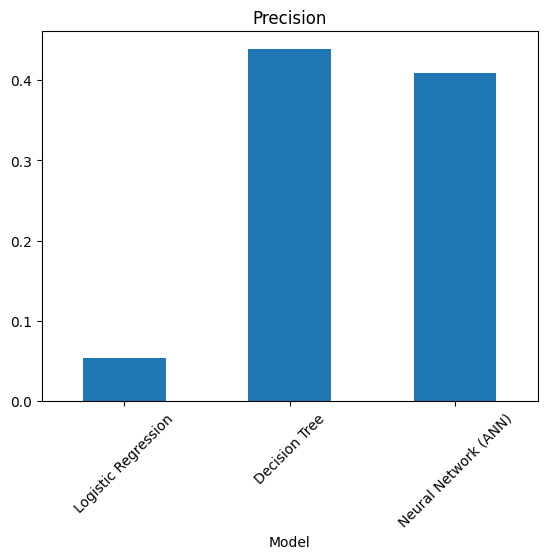

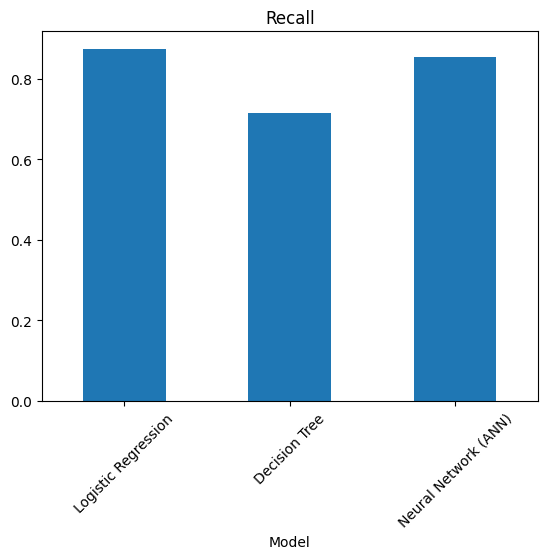

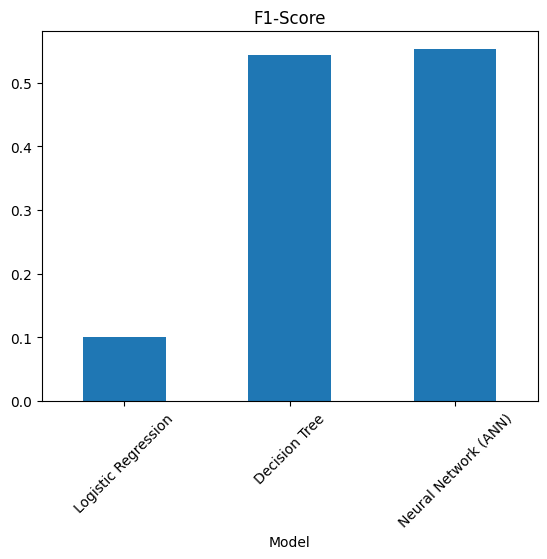

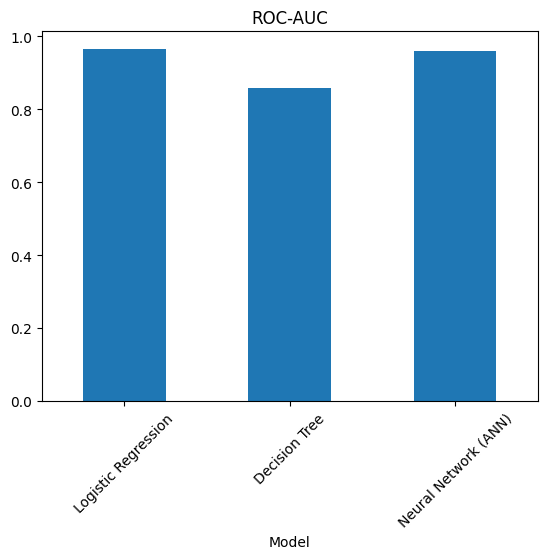

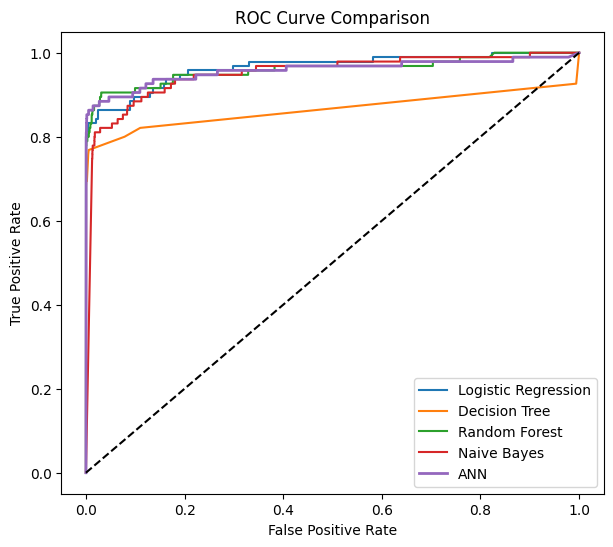

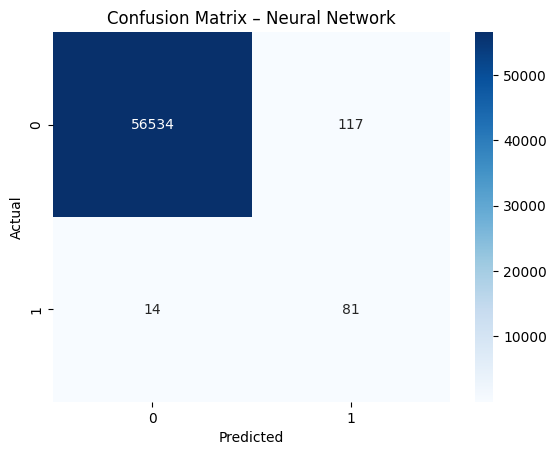

In [119]:
# METRICS COMPARISON TABLE
metrics_df = pd.DataFrame(metrics)
print(metrics_df.sort_values(by="ROC-AUC", ascending=False))

# BAR GRAPHS FOR METRICS
for metric in ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]:
    metrics_df.plot(x="Model", y=metric, kind="bar", legend=False, title=metric)
    plt.xticks(rotation=45)
    plt.show()

# ROC CURVE COMPARISON
plt.figure(figsize=(7,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

fpr_ann, tpr_ann, _ = roc_curve(y_test, y_prob_ann)
plt.plot(fpr_ann, tpr_ann, label="ANN", linewidth=2)

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# CONFUSION MATRIX HEATMAP (ANN)
cm = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()